Group members:
* Student 1: Pablo Soler
* Student 2: Álvaro Payo

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# You can download the data from
# https://github.com/joashxu/prosper-loan-data/blob/master/dataset/prosperLoanData.csv

# Dataset description
# https://github.com/joashxu/prosper-loan-data/tree/master/dataset

In [3]:
# Read the Prosper Loan Data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/DS for Credit Risk Analytics/prosperLoanData.csv')

In [5]:
df.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [6]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

## 1

Display the "LoanStatus" and "Investors" columns for the row with "ListingNumber" = 816108

In [7]:
## WRITE YOUR CODE HERE ##
df.loc[df.ListingNumber == 816108, ['LoanStatus', 'Investors']]

,LoanStatus,Investors
44,Current,1


## 2

Create a new column called "SingleInvestor" which takes the value True if the column "Investors" is 1, and takes the value False otherwise

In [8]:
## WRITE YOUR CODE HERE ##
df['SingleInvestor'] = df['Investors'] == 1

In [9]:
pd.DataFrame(df, columns = ['SingleInvestor', 'Investors'])
#Vemos que cuando Investors es 1, SingleInvestor es True.

,SingleInvestor,Investors
0,False,258
1,True,1
2,False,41
3,False,158
4,False,20
...,...,...
113932,True,1
113933,False,22
113934,False,119
113935,False,274


In [10]:
df_count_SI = pd.DataFrame(df.groupby(['SingleInvestor'])['SingleInvestor'].count().rename('Count'))
df_count_SI['Percentage'] = df_count_SI['Count']/df_count_SI['Count'].sum()
df_count_SI = df_count_SI.sort_values(by = "Count", ascending=False).reset_index()
df_count_SI

,SingleInvestor,Count,Percentage
0,False,86123,0.755883
1,True,27814,0.244117


In [11]:
df_count_I = pd.DataFrame(df.groupby(['Investors'])['Investors'].count().rename('Count'))
df_count_I['Percentage'] = df_count_I['Count']/df_count_SI['Count'].sum()
df_count_I = df_count_I.sort_values(by = "Count", ascending=False).reset_index()
df_count_I.head(10)

,Investors,Count,Percentage
0,1,27814,0.244117
1,2,1386,0.012165
2,3,991,0.008698
3,4,827,0.007258
4,5,753,0.006609
5,8,753,0.006609
6,10,728,0.006389
7,6,721,0.006328
8,9,721,0.006328
9,11,717,0.006293


In [12]:
#Comprobación: 27814 Trues en ambos

## 3

Count how many rows have NA as ProsperScore, and count how many rows have a ProsperScore higher than 8

In [13]:
## WRITE YOUR CODE HERE ##
df['ProsperScore'].isnull().sum()

29084

In [14]:
(df['ProsperScore'] > 8).sum()

13117

## 4

Display how many rows and mean "Investors" we have per CreditGrade

In [15]:
## WRITE YOUR CODE HERE ##
df['CreditGrade'].unique()

array(['C', nan, 'HR', 'AA', 'D', 'B', 'E', 'A', 'NC'], dtype=object)

In [16]:
df_CG = pd.DataFrame(df.groupby(['CreditGrade'])['Investors'].count().rename('Rows'))
df_CG['Mean_Investors'] = df.groupby("CreditGrade")["Investors"].agg('mean')
df_CG

,Rows,Mean_Investors
CreditGrade,,
A,3315,186.689291
AA,3509,188.102023
B,4389,168.241285
C,5649,111.960701
D,5153,84.656705
E,3289,48.395257
HR,3508,30.510547
NC,141,28.617021


## 5

The "LoanFirstDefaultedCycleNumber" column captures the month in which the loan first defaulted. Create a column called fraud, that will be True if the loan was defaulted in less than 4 months. Calculate what is the fraud rate in the portfolio based on that new column.

In [34]:
df['Fraud'] = [True if i<4 else False for i in df['LoanFirstDefaultedCycleNumber']]
df['Fraud'].head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: Fraud, dtype: bool

In [37]:
print(round(((sum(df['Fraud'])/len(df['Fraud']))*100),4), '%')

0.4915 %


## 6

Create a new column called is_student, which will be true if the column "Occupation" contains the text "Student". Count how many rows and what is the fraud rate based on the is_student column.

In [19]:
## WRITE YOUR CODE HERE ##
df['is_student'] = pd.DataFrame(df['Occupation'].isin(["Student - College Senior", "Student - College Graduate Student" , "Student - Technical School",
"Student - College Sophomore", "Student - College Junior", "Student - Community College", "Student - College Freshman"]))
df['is_student']

0         False
1         False
2         False
3         False
4         False
          ...  
113932    False
113933    False
113934    False
113935    False
113936    False
Name: is_student, Length: 113937, dtype: bool

In [38]:
df_count_st = pd.DataFrame(df.groupby(['is_student']).agg({'is_student':'count','Fraud':'sum'}))
df_count_st.columns = ['Rows', 'Fraud']
df_count_st['fraud_rate'] = df_count_st.Fraud/df_count_st.Rows

df_count_st

,Rows,Fraud,fraud_rate
is_student,,,
False,113238,557,0.004919
True,699,3,0.004292


## 7

Study the fraud rate versus the "IncomeRange" columns. Is there any insight we can learn from it?

In [40]:
## WRITE YOUR CODE HERE ##
Fraud_vs_Income = pd.DataFrame(df.groupby('IncomeRange').agg({'IncomeRange':'count', 'Fraud':'sum'}))
Fraud_vs_Income.columns = ['Rows', 'Fraud']
Fraud_vs_Income['fraud_rate'] = Fraud_vs_Income.Fraud/Fraud_vs_Income.Rows
Fraud_vs_Income

,Rows,Fraud,fraud_rate
IncomeRange,,,
$0,621,7,0.011272
"$1-24,999",7274,41,0.005637
"$100,000+",17337,36,0.002076
"$25,000-49,999",32192,146,0.004535
"$50,000-74,999",31050,142,0.004573
"$75,000-99,999",16916,70,0.004138
Not displayed,7741,113,0.014598
Not employed,806,5,0.006203


In [42]:
## EXPLAIN YOUR INSIGHTS HERE ##

#Los que no dicen sus ingresos y los que no tienen ingresos son los que tienen una tasa más alta de fraude.

#Los desempleados también tienen una tasa de fraude relativamente alta, aunque detrás de los dos grupos nombrados anteriormente.

#Los que ganan más dinero son los que menos tasa de fraude tienen.

## 8

Compute the correlation between the features in the next cell. Is there any insight we can learn from the correlation?

In [23]:
feats = ["EmploymentStatusDuration", "OpenRevolvingAccounts", "OpenCreditLines", "CreditScoreRangeLower", "CreditScoreRangeUpper"]

In [24]:
## WRITE YOUR CODE HERE ##
features = pd.DataFrame(df, columns = ['EmploymentStatusDuration', 'OpenRevolvingAccounts', 'OpenCreditLines', 'CreditScoreRangeLower', 'CreditScoreRangeUpper'])
features

,EmploymentStatusDuration,OpenRevolvingAccounts,OpenCreditLines,CreditScoreRangeLower,CreditScoreRangeUpper
0,2.0,1,4.0,640.0,659.0
1,44.0,13,14.0,680.0,699.0
2,NaN,0,NaN,480.0,499.0
3,113.0,7,5.0,800.0,819.0
4,44.0,6,19.0,680.0,699.0
...,...,...,...,...,...
113932,246.0,9,9.0,700.0,719.0
113933,21.0,9,13.0,700.0,719.0
113934,84.0,9,12.0,700.0,719.0
113935,94.0,7,11.0,680.0,699.0


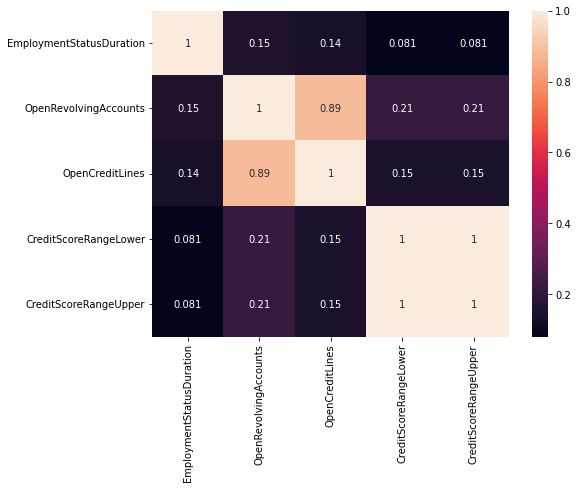

In [43]:
corr_df = features.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

In [27]:
## EXPLAIN YOUR INSIGHTS HERE ##

#Hay una estrecha relación entre los rangos de puntuación de créditos altos y bajos, ya que se correlación es de 1

#Hay una gran relación entre abrir una línea de crédito y una cuenta de revolving, ya que su correlación es de 0.89

#El resto de correlaciones son considerablemente bajas, ya que se encuentran por debajo del 0.25